<IPython.core.display.Javascript object>


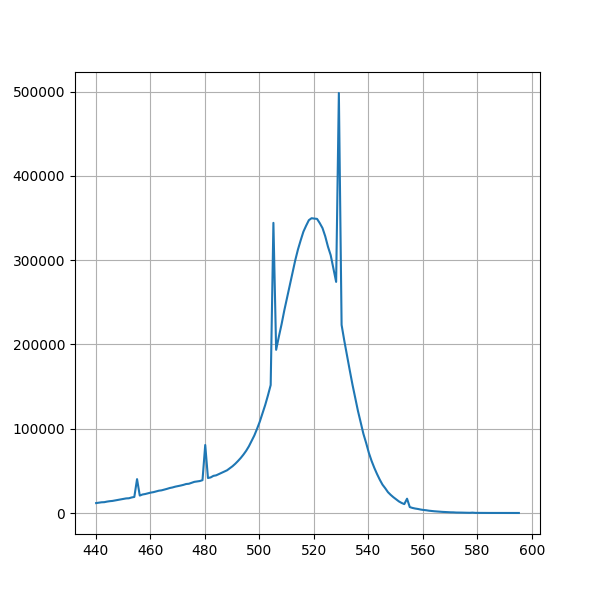

In [2]:
%matplotlib notebook
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

def get_background_histogram(array, min_count, max_count):
    flattened_array = np.ndarray.flatten(array)
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels


m3_fits=fits.open('Messier3.fits')
#m3_fits.info()
m3_header=m3_fits[0].header
m3_data=m3_fits[0].data

#unprocessed plot
#plt.figure(figsize=(6,6))
#plt.imshow(m3_data)

mean, median, std = sigma_clipped_stats(m3_data)

#plots in full glory
#plt.figure(figsize=(6,6))
#plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='viridis')
#plt.colorbar()

#plots the cluster
#plt.figure(figsize=(6,6))
#plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std, cmap='viridis')
#plt.colorbar()

bins,num_pixels=get_background_histogram(m3_data,median - 5*std,median + 5*std)

#plt.figure(figsize=(6,6))
#plt.grid()
#plt.plot(bins,num_pixels)


background=np.concatenate([m3_data[:1000, :], m3_data[3000:, :], m3_data[1000:3000, :1000], m3_data[1000:3000, 3000:]], axis=None)
mean,median,std=sigma_clipped_stats(background)

bins,num_pixels=get_background_histogram(background,median - 5*std,median + 5*std)

plt.figure(figsize=(6,6))
plt.grid()
plt.plot(bins,num_pixels)

f=open('temp_Growth.tmp','w+')
for i in range(len(bins)):
    f.write('%f,%f\n'%(bins[i],num_pixels[i]))
f.close()